In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Загрузка данных

In [2]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2020-10-14 21:35:41--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449.88K  1.87MB/s    in 0.2s    

2020-10-14 21:35:42 (1.87 MB/s) - ‘house_prices_train.csv’ saved [460676/460676]

--2020-10-14 21:35:42--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451405 (441K) [text/plain]
S

In [3]:
path = {'train': 'house_prices_train.csv', 'test':'house_prices_test.csv'}
data = pd.read_csv(path['train'])
test_data = pd.read_csv(path['test'])

# Иследование данных

In [4]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/doc/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


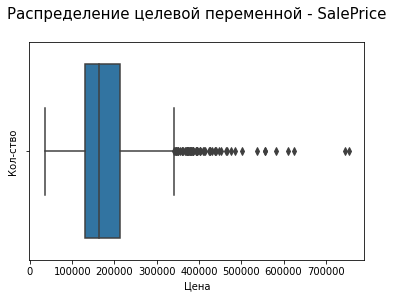

In [5]:
sns.boxplot(data.SalePrice.values)
plt.title("Распределение целевой переменной - SalePrice\n", fontsize=15)
plt.xlabel('Цена')
plt.ylabel("Кол-ство")
plt.show();

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

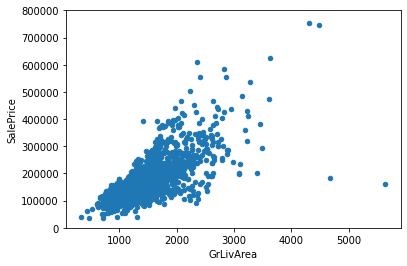

In [6]:
gr_liv_area_data = pd.concat([data['SalePrice'], data['GrLivArea']], axis=1)
gr_liv_area_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800_000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

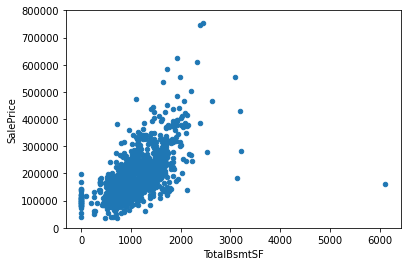

In [7]:
total_bsmtSF = pd.concat([data.SalePrice, data.TotalBsmtSF], axis=1)
total_bsmtSF.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800_000))

In [8]:
overallQual = pd.concat([data.SalePrice, data.OverallQual], axis=1)

(-0.5, 9.5, 0.0, 800000.0)

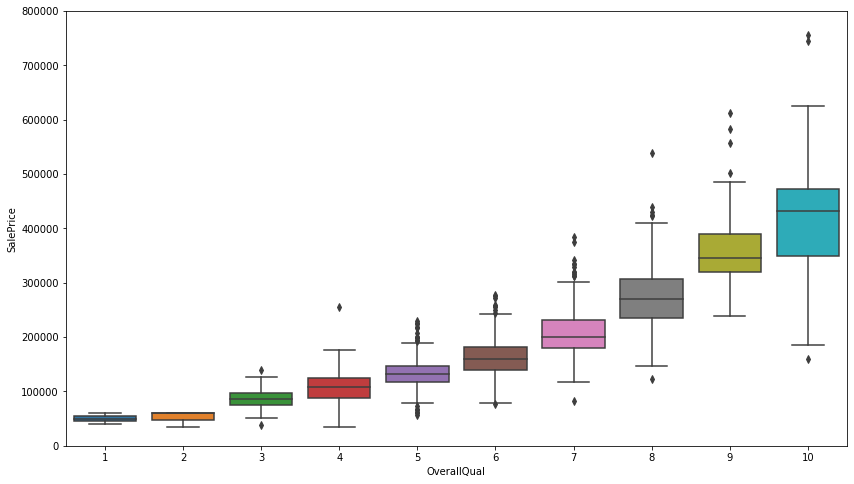

In [9]:
f, ax = plt.subplots(figsize=(14,8))
fig = sns.boxplot(x="OverallQual", y='SalePrice', data=overallQual)
fig.axis(ymin=0, ymax=800_000)

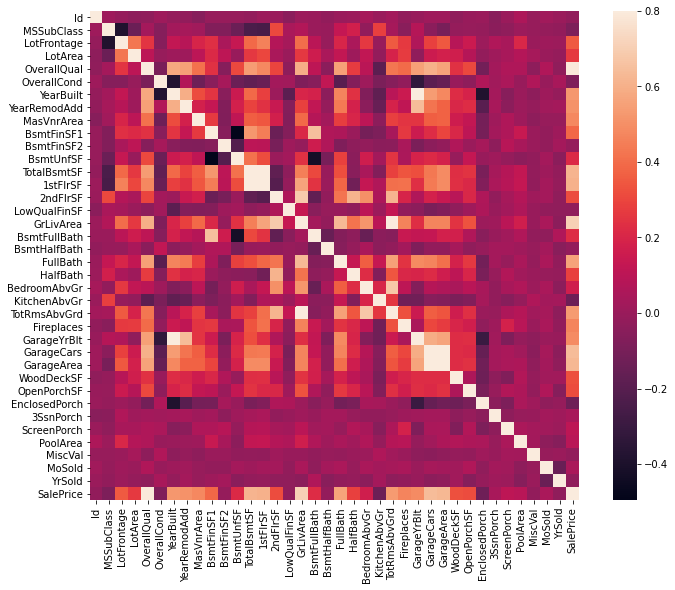

In [10]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

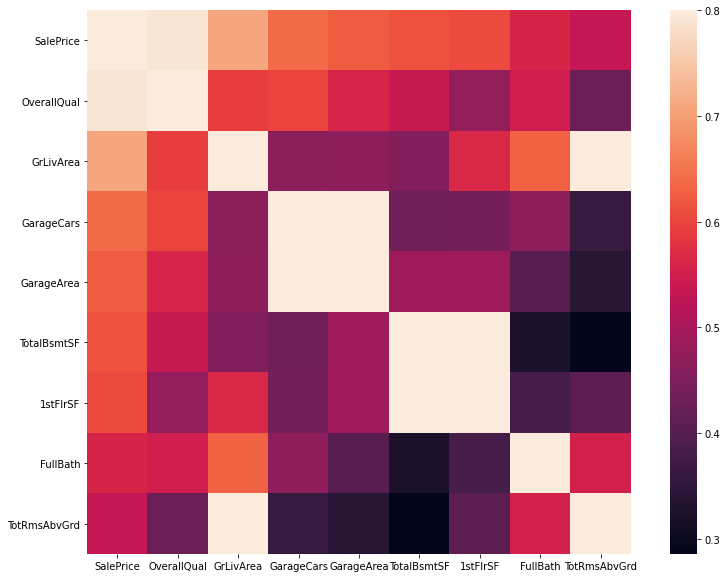

In [11]:
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data[cols].corr(), vmax=.8, square=True);

/home/doc/env/lib/python3.7/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


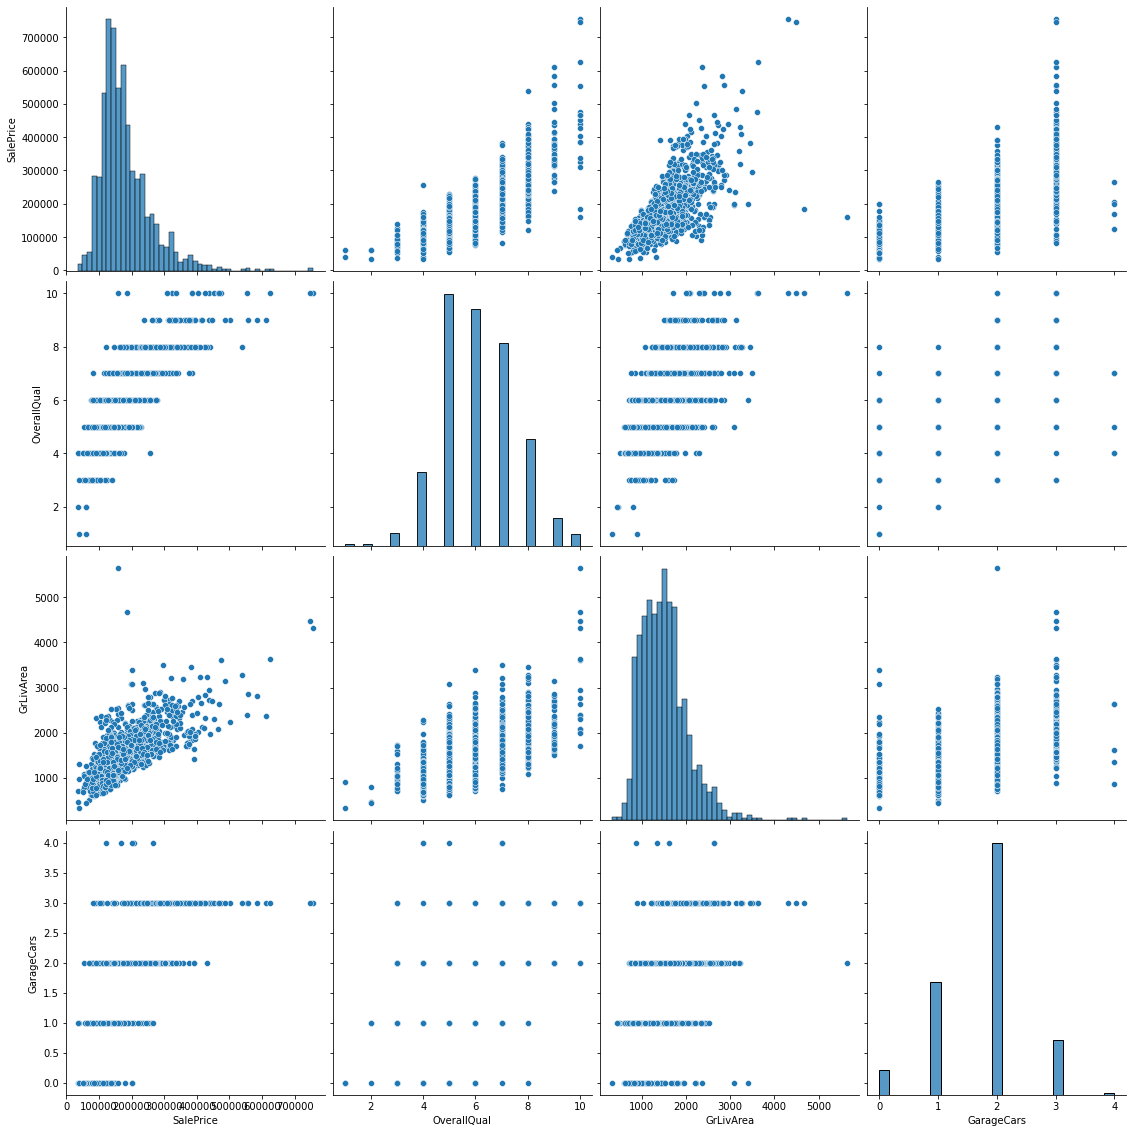

In [12]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(data[cols], size = 4);

# Оценка невалидных данных

In [13]:
total = data.isnull().sum()
total

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
percent = (total/ data.isnull().count()).sort_values(ascending=False)
percent

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [15]:
missing_data = pd.concat([total.sort_values(ascending=False), percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# Feature scaling

We will do a little preprocessing to our data using the following formula (standardization):

$$x'= \frac{x - \mu}{\sigma}$$
Где µ - среднее значение по совокупности, а σ - стандартное отклонение.

In [16]:
x = data['GrLivArea']

y = data['SalePrice']

In [17]:
def feature_scaling(data):
    data_ = (data - data.mean()) / data.std()
    return np.c_[np.ones(data_.shape[0]), data_]

In [18]:
x = feature_scaling(x)

In [19]:
x.shape 

(1460, 2)

# Реализация регрессии

$$Y = bX + a$$

![](https://spss-tutorials.com/img/simple-linear-regression-equation-linear-relation.png)


In [20]:
class LinearRegression:
    
    """Реализация линейной регрессии"""
    
    def predict(self, X):
        return np.dot(X, self._W)

    
    def loss(self, y_prediction, y):
        return sum((y_prediction - y)**2) / len(y)
   

    def _step_gradient_descent(self, X, y, prediction, step_learn):
        error = prediction - y
        self._W -= step_learn * 2 * np.dot(X.T, error) / len(X)

        
    def fit(self, X, y, iterations = 100_000, step_learn = .01):
        self._W = np.zeros(X.shape[1])
        self._cost_history = []
        self._w_history = [self._W]
        
        for i in range(iterations):
            
            prediction = self.predict(X)
            cost = self.loss(prediction, y)
            self._cost_history.append(cost)
            self._step_gradient_descent(X, y, prediction, step_learn)
            self._w_history.append(self._W.copy())
        return "=> Обучение прошло успешно <="    

In [21]:
simple_regression = LinearRegression()
simple_regression.fit(x, y , iterations=2000, step_learn=0.01)

'=> Обучение прошло успешно <='

In [22]:
simple_regression._W

array([180921.19589041,  56294.90210563])

# Визуализация функции потерь в зависимости от итерации

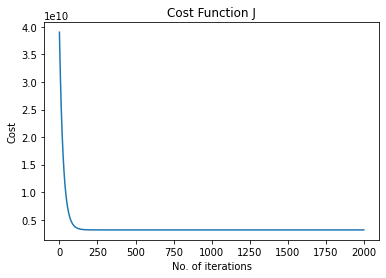

In [23]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(simple_regression._cost_history)
plt.show()

In [24]:
simple_regression._cost_history[0]

39039267707.765755

In [25]:
simple_regression.predict([x[0]]) - data.SalePrice[0]

array([-6738.06031195])

# Многомерная линейная регрессия

In [26]:
x_m = data[['OverallQual', 'GrLivArea', 'GarageCars']]
x_m = feature_scaling(x_m)

In [27]:
multivariable_regression = LinearRegression()
multivariable_regression.fit(x_m, y, iterations=2000, step_learn=0.01)

'=> Обучение прошло успешно <='

In [28]:
multivariable_regression._W

array([180921.19589041,  37485.87521903,  26628.3068807 ,  15917.03541542])

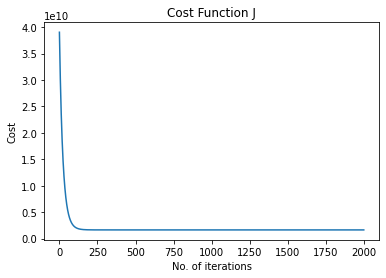

In [29]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(multivariable_regression._cost_history)
plt.show()

In [30]:
multivariable_regression._cost_history[-1]

1645634055.5317771

In [31]:
simple_regression._cost_history[-1]

3139843209.6665273

# Проверка модели на тестовых данных

In [32]:
test_simple = test_data['GrLivArea']
test_multi =  test_data[['OverallQual', 'GrLivArea', 'GarageCars']]
test_simple = feature_scaling(test_simple)
test_multi = feature_scaling(test_multi)

In [33]:
predictions_simple = simple_regression.predict(test_simple)
predictions_simple

array([112513.25410596, 162713.81934176, 197494.81142199, ...,
       150540.47211368, 121092.56548575, 240507.30496121])

In [34]:
predictions_multi = multivariable_regression.predict(test_multi)
predictions_multi

array([104701.75709256, 154536.97789247, 165412.3644054 , ...,
       143202.27948268,  88246.80047759, 258450.24224373])

# Сохранение результатов

In [35]:
def save(feature, result:pd.DataFrame, name:np.ndarray) -> None:
    output_multi = pd.DataFrame({'Id': feature.Id, 'SalePrice': result})
    output_multi.to_csv(f'{name}_submission.csv', index=False)
    print("=> Your submission was successfully saved! <=")

In [36]:
save(test_data, predictions_simple, 'Simple_regression')
save(test_data, predictions_multi, 'Multi_regression')

=> Your submission was successfully saved! <=
=> Your submission was successfully saved! <=
